#  第四讲 小世界网络【实践】二

In [1]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-
# Author ： 单哥的科研日常
# 关注B站和公众号：单哥的科研日常，获取更多讲解教程

### 实验环境：
### Python版本==3.9.6, networkx==3.0, matplotlib==3.5.3, numpy==1.24.2, pandas==1.5.3

## 1、WS小世界网络的“小世界”与“高集聚”特性

In [19]:
# 导入库
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# 设置初始参数
N, K = 1000, 10
samples = 10
p_rew = np.logspace(0,4,15)/10000
p_rew

array([1.00000000e-04, 1.93069773e-04, 3.72759372e-04, 7.19685673e-04,
       1.38949549e-03, 2.68269580e-03, 5.17947468e-03, 1.00000000e-02,
       1.93069773e-02, 3.72759372e-02, 7.19685673e-02, 1.38949549e-01,
       2.68269580e-01, 5.17947468e-01, 1.00000000e+00])

In [22]:
# 平均距离与平均集聚系数
C = []
CT = [] # 理论近似值：{[3(K-2)]/[4(K-1)]}*(1-p)^3
L = []
sigma = []
for p in p_rew:
    s1 = 0
    s2 = 0
    s3 = 0
    for i in range(samples):
        # 为了防止在计算平均距离时报错：最好改用生成连通WS小世界网络函数connected_watts_strogatz_graph()
        G = nx.connected_watts_strogatz_graph(N, K, p, tries=100)
        G_random = nx.gnm_random_graph(N, N*K/2)
        while not nx.is_connected(G_random):
            G_random = nx.gnm_random_graph(N, N*K/2) 
        c = nx.average_clustering(G)
        cr = nx.average_clustering(G_random)
        l = nx.average_shortest_path_length(G)
        lr = nx.average_shortest_path_length(G_random)
        s1 += c
        s2 += l
        s3 += (c/cr)/(l/lr)
        
        
    ct = (3*(K-2)/(4*(K-1)))*((1-p)**3)
    CT.append(ct)
    C.append(s1/samples)
    L.append(s2/samples)
    sigma.append(s3/samples)

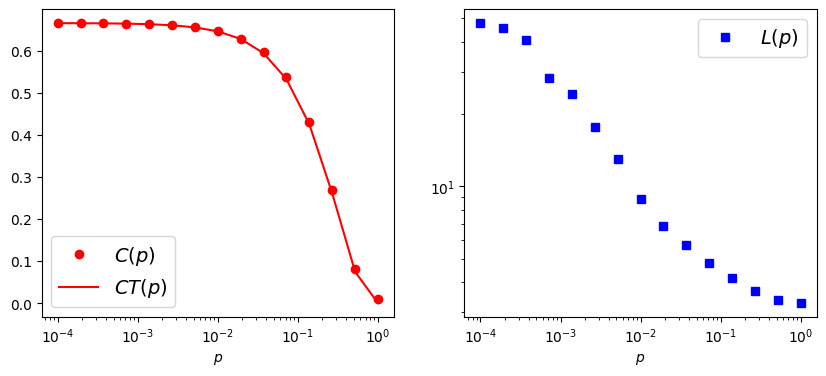

In [23]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(p_rew, C, 'ro', label='$C(p)$')
plt.plot(p_rew, CT, 'r-', label='$CT(p)$')
plt.legend(loc=0, fontsize=14)
plt.xlabel("$p$")
plt.xscale("log")

plt.subplot(122)
plt.plot(p_rew, L, 'bs', label='$L(p)$')
plt.legend(loc=0, fontsize=14)
plt.xlabel("$p$")
plt.xscale("log")
plt.yscale("log")

# plt.savefig("C_L.png", dpi=600)

In [24]:
# 初始规则网络的平均集聚系数和平均距离
G0 = nx.watts_strogatz_graph(N, K, 0)
C0 = nx.average_clustering(G0)
L0 = nx.average_shortest_path_length(G0)

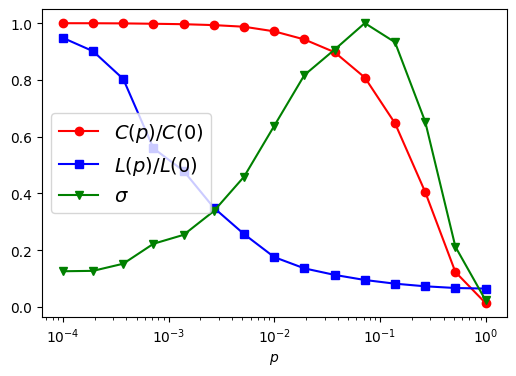

In [25]:
plt.figure(figsize=(6,4))
plt.plot(p_rew, np.array(C)/C0, 'ro-', label='$C(p)/C(0)$')
plt.plot(p_rew, np.array(L)/L0, 'bs-', label='$L(p)/L(0)$')
plt.plot(p_rew, np.array(sigma)/max(sigma), 'gv-', label=r'$\sigma$')
plt.legend(loc=0, fontsize=14)
plt.xlabel("$p$")
plt.xscale("log")
# plt.savefig("C_L2.png", dpi=600)

## 2、真实网络的集聚系数与度之间的依赖关系（以科学合作网络为例）

In [8]:
def C_vs_k(G):
    klist = [G.degree(i) for i in G.nodes()]
    # 计算每个节点的集聚系数
    all_C = {i: nx.clustering(G, i) for i in G.nodes()}
    all_k = list(set(klist))  # 所有可能的度值
    
    # 计算度值为k的节点的集聚系数的平均值
    C_k = {}
    for k in sorted(all_k):
        s = 0
        j = 0
        for i in G.nodes():
            if G.degree(i) == k:
                j = j + 1
                s = s + all_C[i]
        avc_k = s/j   
        C_k[k] = avc_k
    
    return C_k

In [9]:
import pandas as pd
df = pd.read_csv("citation.csv")
G = nx.from_pandas_edgelist(df, 'source', 'target', create_using = nx.Graph())
len(G.nodes())

23133

In [10]:
C_k = C_vs_k(G)
avC = nx.average_clustering(G)
print(avC)
x = np.linspace(1,10000,10000)
y = [avC]*10000

0.6334130270820665


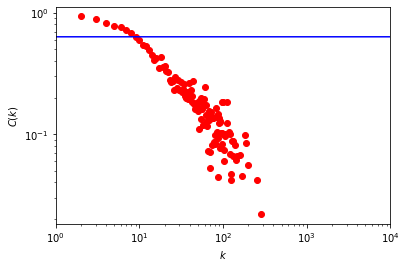

In [11]:
plt.figure(figsize=(6,4))
plt.plot(C_k.keys(), C_k.values(), 'ro')
plt.plot(x, y, 'b-')
plt.xlabel("$k$")
plt.ylabel("$C(k)$")
plt.xscale("log")
plt.yscale("log")
plt.xlim([1,1e4])
# plt.savefig("C(k)_k_citation.png", dpi=600)